In [57]:
%matplotlib inline

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

plt.style.use("ggplot")

In [58]:
dataset = pd.read_csv("student-mat.csv", sep=";")
data = dataset[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

In [59]:
X = np.array(data.drop([predict], 1))   # Attributes
y = np.array(data[predict])             # Labels

# Split dataset in 4 arrays & test on 10% of the data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)


C:\Users\lars29i0\AppData\Local\Temp/ipykernel_16652/4262250817.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop([predict], 1))   # Attributes


In [60]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)  # Accuracy of model

print(f"Accuracy:     {round(acc * 100, 2)}%")
print(f"Coefficients: {linear.coef_}")
print(f"Intercept:    {linear.intercept_}")

Accuracy:     88.41%
Coefficients: [ 0.16603948  0.96757703 -0.25831727 -0.29972806  0.0353225 ]
Intercept:    -1.3576831676893057


In [61]:
predictions = linear.predict(x_test)
for i, true_label in enumerate(predictions):
    print(f"True Label: {true_label}\t Prediction: {y_test[i]}")


True Label: 5.351738142462455	 Prediction: 0
True Label: 9.510859658348085	 Prediction: 11
True Label: 6.786828503192288	 Prediction: 8
True Label: 20.109898853677084	 Prediction: 19
True Label: 18.226080028332735	 Prediction: 18
True Label: 12.831517543020562	 Prediction: 13
True Label: 10.266014922827793	 Prediction: 11
True Label: 13.121014270354976	 Prediction: 12
True Label: 8.117322290123818	 Prediction: 9
True Label: 10.998187931019588	 Prediction: 11
True Label: 10.263385004514467	 Prediction: 12
True Label: 6.4389723730666955	 Prediction: 9
True Label: 11.89200326569808	 Prediction: 11
True Label: 15.9098347930716	 Prediction: 18
True Label: 9.811955722214718	 Prediction: 10
True Label: 6.914664364376057	 Prediction: 8
True Label: 12.26997773152851	 Prediction: 12
True Label: 8.269672066754344	 Prediction: 9
True Label: 12.83794750779021	 Prediction: 13
True Label: 19.07167682663261	 Prediction: 18
True Label: 6.227037390298532	 Prediction: 8
True Label: 10.076506397937068	 Pr

In [62]:
best = 0

for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
    training_model = linear_model.LinearRegression()
    training_model.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)
    if accuracy > best:
        best = accuracy

predictions = training_model.predict(x_test)
for i in range(10):
    print(f"Parameters: {x_test[i]} \t Prediction: {int(predictions[i])} \t\t True Label: {y_test[i]}")

Parameters: [5 6 2 0 6] 	 Prediction: 5 		 True Label: 6
Parameters: [ 9 10  3  0  4] 	 Prediction: 9 		 True Label: 10
Parameters: [18 19  1  0  6] 	 Prediction: 19 		 True Label: 19
Parameters: [13 15  4  0  0] 	 Prediction: 14 		 True Label: 15
Parameters: [13 14  1  0  0] 	 Prediction: 14 		 True Label: 14
Parameters: [16 12  1  0  8] 	 Prediction: 12 		 True Label: 13
Parameters: [6 0 1 0 0] 	 Prediction: 0 		 True Label: 0
Parameters: [11 10  3  0  4] 	 Prediction: 9 		 True Label: 11
Parameters: [12 10  2  0  8] 	 Prediction: 10 		 True Label: 11
Parameters: [12 12  2  0 12] 	 Prediction: 12 		 True Label: 11


Text(0, 0.5, 'Prediction')

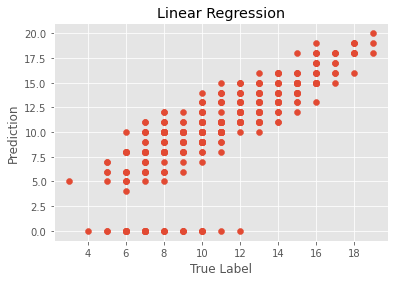

In [63]:
plt.title("Linear Regression")
plt.scatter(data["G1"], data["G3"])
plt.xlabel("True Label")
plt.ylabel("Prediction")